# Necessary libraries

In [2]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from PIL import Image

In [2]:
cities = ["Mont Saint Michel",
"St Malo",
"Bayeux",
"Le Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau du Haut Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Verdon Gorge",
"Bormes les Mimosas",
"Cassis",
"Marseille",
"Aix en Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues Mortes",
"Saintes Maries de la mer",
"Collioure",
"Carcassonne",
"Ariège",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La Rochelle"]

# Get GPS coordinates

##### https://nominatim.org/

### Test one city

In [3]:
# d'abord on va essayer juste sur Paris
city = "Pau"
# Request Nominatim (ne pas oublier le format JSON)
r =  requests.get(f"https://nominatim.openstreetmap.org/search?city={city}&format=json")
print("Response is good :",r)
print("Content is a JSON in bytes :",r.content)

latitude = r.json()[0]["lat"]
longitude = r.json()[0]["lon"]
print(city,"coordinates are :",latitude,longitude)

Response is good : <Response [200]>
Content is a JSON in bytes : b'[{"place_id":298162682,"licence":"Data \xc2\xa9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright","osm_type":"relation","osm_id":162431,"boundingbox":["43.2857792","43.3580393","-0.3925513","-0.2943049"],"lat":"43.2957547","lon":"-0.3685668","display_name":"Pau, Pyr\xc3\xa9n\xc3\xa9es-Atlantiques, Nouvelle-Aquitaine, France m\xc3\xa9tropolitaine, 64000, France","class":"boundary","type":"administrative","importance":0.7156972095985377,"icon":"https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png"},{"place_id":297806926,"licence":"Data \xc2\xa9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright","osm_type":"relation","osm_id":40092,"boundingbox":["39.7801496","39.8212268","8.7463439","8.8131899"],"lat":"39.791546","lon":"8.802331","display_name":"Pau, Aristanis/Oristano, Sardigna/Sardegna, 09090, Italia","class":"boundary","type":"administrative","importance":0.5

### Loop over all cities

In [4]:
# List of cities not found:
not_found_cities = []

# List to retrieve a dictionnary for each city, containing the coordinates
coordinates = []

for city in cities:
    r =  requests.get(f"https://nominatim.openstreetmap.org/search?city={city}&format=json")
    # if the city is found, take coordinates
    if len(r.json())>0:
        latitude = r.json()[0]["lat"]
        longitude = r.json()[0]["lon"]
        GPS = {"city":city, "latitude":latitude, "longitude":longitude}
        coordinates.append(GPS)
    # if the city is not found, print a message
    else:
        print(f"{city} not found, removed from analysis")
        not_found_cities.append(city)


print("Two cities were not found, indeed they are cities, one is a region, the other a place.")
# print(coordinates)

# Update our list of cities:
cities = [city for city in cities if city not in not_found_cities]


Verdon Gorge not found, removed from analysis
Ariège not found, removed from analysis
Two cities were not found, indeed they are cities, one is a region, the other a place.


In [5]:
coordinates_df = pd.DataFrame(coordinates)
print(coordinates_df)

                            city    latitude           longitude
0              Mont Saint Michel  48.6359541  -1.511459954959514
1                        St Malo   48.649518          -2.0260409
2                         Bayeux  49.2764624          -0.7024738
3                       Le Havre  49.4938975           0.1079732
4                          Rouen  49.4404591           1.0939658
5                          Paris  48.8534951           2.3483915
6                         Amiens  49.8941708           2.2956951
7                          Lille  50.6365654           3.0635282
8                     Strasbourg   48.584614           7.7507127
9   Chateau du Haut Koenigsbourg  48.2495226           7.3454923
10                        Colmar  48.0777517           7.3579641
11                     Eguisheim  48.0447968           7.3079618
12                      Besancon  47.2380222           6.0243622
13                         Dijon  47.3215806           5.0414701
14                       

# Get weather - Part 1

##### https://openweathermap.org/appid (subscribe to get a free apikey)
##### This API gives you CURRENT weather

Output :

{
  "coord": {
    "lon": 10.99,
    "lat": 44.34
  },
  "weather": [
    {
      "id": 501,
      "main": "Rain",
      "description": "moderate rain",
      "icon": "10d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 298.48,
    "feels_like": 298.74,
    "temp_min": 297.56,
    "temp_max": 300.05,
    "pressure": 1015,
    "humidity": 64,
    "sea_level": 1015,
    "grnd_level": 933
  },
  "visibility": 10000,
  "wind": {
    "speed": 0.62,
    "deg": 349,
    "gust": 1.18
  },
  "rain": {
    "1h": 3.16
  },
  "clouds": {
    "all": 100
  },
  "dt": 1661870592,
  "sys": {
    "type": 2,
    "id": 2075663,
    "country": "IT",
    "sunrise": 1661834187,
    "sunset": 1661882248
  },
  "timezone": 7200,
  "id": 3163858,
  "name": "Zocca",
  "cod": 200
}   

### Test one city

In [6]:
API_key = '9aa4c755017865068ac661a22fc34f2a'
# Use URL received by email for our suscription

city = "Paris"
# Retrieve coordinates from the previous list made
lat, lon = [(dico['latitude'], dico['longitude']) for dico in coordinates if dico['city'] == city][0]
# Call API
r =  requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&APPID={API_key}&units=metric")

if r.status_code == 200:
    r_json = r.json()
    weather = {"city":city,
            'latitude':lat, 
            'longitude':lon, 
            "main_weather": r_json["weather"][0]["description"],
            "feels_like": r_json["main"]["feels_like"],
            "humidity": r_json["main"]["humidity"],
            "wind": r_json["wind"]["speed"]}

print(city,"weather is :",weather)

Paris weather is : {'city': 'Paris', 'latitude': '48.8534951', 'longitude': '2.3483915', 'main_weather': 'overcast clouds', 'feels_like': 22.44, 'humidity': 50, 'wind': 6.17}


### Loop over all cities

In [7]:
API_key = '9aa4c755017865068ac661a22fc34f2a'

# Create new list
liste_weathers = []

# Use URL received by email for our suscription

for city in cities:
        # Retrieve coordinates from the previous list made
        lat, lon = [(dico['latitude'], dico['longitude']) for dico in coordinates if dico['city'] == city][0]
        # Call API
        r =  requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&APPID={API_key}&units=metric")
        if r.status_code == 200:
                r_json = r.json()
                weather = {"city":city,
                        'latitude':lat, 
                        'longitude':lon, 
                        "main_weather": r_json["weather"][0]["description"],
                        "feels_like": r_json["main"]["feels_like"],
                        "humidity": r_json["main"]["humidity"],
                        "wind": r_json["wind"]["speed"]}
                liste_weathers.append(weather)
        else:
                print(f"{city} not found, skipped")


# print(liste_weathers)

In [8]:
weather_df = pd.DataFrame(data = liste_weathers)
weather_df.head()

,city,latitude,longitude,main_weather,feels_like,humidity,wind
0,Mont Saint Michel,48.6359541,-1.511459954959514,broken clouds,18.43,80,5.81
1,St Malo,48.649518,-2.0260409,overcast clouds,18.92,63,5.66
2,Bayeux,49.2764624,-0.7024738,overcast clouds,18.57,56,6.89
3,Le Havre,49.4938975,0.1079732,overcast clouds,16.51,88,5.66
4,Rouen,49.4404591,1.0939658,overcast clouds,19.48,65,4.63


# Get Weather - Part 2

##### https://openweathermap.org/api/one-call-api
##### This API gives you FORECAST weather (5days forecast, many timepoints per day)

Output:


{
  "cod": "200",
  "message": 0,
  "cnt": 40,
  "list": [
    {
      "dt": 1661871600,
      "main": {
        "temp": 296.76,
        "feels_like": 296.98,
        "temp_min": 296.76,
        "temp_max": 297.87,
        "pressure": 1015,
        "sea_level": 1015,
        "grnd_level": 933,
        "humidity": 69,
        "temp_kf": -1.11
      },
      "weather": [
        {
          "id": 500,
          "main": "Rain",
          "description": "light rain",
          "icon": "10d"
        }
      ],
      "clouds": {
        "all": 100
      },
      "wind": {
        "speed": 0.62,
        "deg": 349,
        "gust": 1.18
      },
      "visibility": 10000,
      "pop": 0.32,
      "rain": {
        "3h": 0.26
      },
      "sys": {
        "pod": "d"
      },
      "dt_txt": "2022-08-30 15:00:00"
    },
    {
      new dictionnary with another dt timepoint, etc etc .... 

### Test one city

In [9]:
# déjà on change d'API on utilise plus WEATHER (meteo actuelle) mais FORECAST (meteo 5jours)
# on va demander la vitesse du vent en prévision sur 5 jours, données chaque 3h

API_key = '9aa4c755017865068ac661a22fc34f2a'

# Create a list for each weather criterium containing all timepoints
forecast_weather = []

city = "Paris" 
# Retrieve coordinates from the previous list made
lat, lon = [(dico['latitude'], dico['longitude']) for dico in coordinates if dico['city'] == city][0]
# Call API
r = requests.get(f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={API_key}&units=metric")
if r.status_code == 200:
    # Retrieve the list containing all the timepoints (each timepoint in a dictionary):
    r_json_criteria = r.json()['list']
    # Retrieve for each timepoint the information needed:
    for timepoint in r_json_criteria:
        weather = {
            "city": city,
            'latitude': lat, 
            'longitude': lon, 
            "timepoint": timepoint["dt"],
            "main_weather": timepoint["weather"][0]["description"],
            "feels_like": timepoint["main"]["feels_like"],
            "humidity": timepoint["main"]["humidity"],
            "wind_speed": timepoint["wind"]["speed"],
        }
        forecast_weather.append(weather)
else:
    print(f"{city} not found, skipped")

forecast_weather_df = pd.DataFrame(data = forecast_weather)
forecast_weather_df.head()

,city,latitude,longitude,timepoint,main_weather,feels_like,humidity,wind_speed
0,Paris,48.8534951,2.3483915,1689768000,overcast clouds,22.46,50,4.92
1,Paris,48.8534951,2.3483915,1689778800,overcast clouds,23.66,43,5.48
2,Paris,48.8534951,2.3483915,1689789600,overcast clouds,23.11,44,4.89
3,Paris,48.8534951,2.3483915,1689800400,few clouds,19.26,60,3.40
4,Paris,48.8534951,2.3483915,1689811200,scattered clouds,16.80,69,2.40


### Loop over all cities

In [10]:
API_key = '9aa4c755017865068ac661a22fc34f2a'

# Create a list for each weather criterium containing all timepoints
forecast_weather = []

for city in cities:

    # Retrieve coordinates from the previous list made
    lat, lon = [(dico['latitude'], dico['longitude']) for dico in coordinates if dico['city'] == city][0]
    # Call API
    r = requests.get(f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={API_key}&units=metric")
    if r.status_code == 200:
        # Retrieve the list containing all the timepoints (each timepoint in a dictionary):
        r_json_criteria = r.json()['list']
        # Retrieve for each timepoint the information needed:
        for timepoint in r_json_criteria:
            weather = {
                "city": city,
                'latitude': lat, 
                'longitude': lon, 
                "timepoint": timepoint["dt"],
                "main_weather": timepoint["weather"][0]["description"],
                "feels_like": timepoint["main"]["feels_like"],
                "humidity": timepoint["main"]["humidity"],
                "wind_speed": timepoint["wind"]["speed"],
            }
            forecast_weather.append(weather)
    else:
        print(f"{city} not found, skipped")

In [11]:
# Create dataframe
forecast_weather_df = pd.DataFrame(data = forecast_weather)

# Create unique identifier for each city
city_ids = forecast_weather_df.groupby('city').ngroup() + 1
forecast_weather_df['city_id'] = city_ids
display(forecast_weather_df.head())

# Save this in a csv file
forecast_weather_df.to_csv('scrap_results/forecast_weather_35cities.csv')

,city,latitude,longitude,timepoint,main_weather,feels_like,humidity,wind_speed,city_id
0,Mont Saint Michel,48.6359541,-1.511459954959514,1689768000,overcast clouds,18.43,80,6.08,24
1,Mont Saint Michel,48.6359541,-1.511459954959514,1689778800,overcast clouds,19.15,72,6.20,24
2,Mont Saint Michel,48.6359541,-1.511459954959514,1689789600,broken clouds,18.40,71,6.03,24
3,Mont Saint Michel,48.6359541,-1.511459954959514,1689800400,scattered clouds,14.70,90,4.18,24
4,Mont Saint Michel,48.6359541,-1.511459954959514,1689811200,broken clouds,14.47,93,3.52,24


In [12]:
# Create average forecast weather dataframe

avg_numerical = forecast_weather_df.groupby('city').mean()
avg_categorical = forecast_weather_df.groupby('city')['main_weather'].agg(lambda x: x.value_counts().index[0])
avg_forecast_weather_df = pd.concat([avg_numerical,avg_categorical],axis=1)
avg_forecast_weather_df = avg_forecast_weather_df.drop(columns="timepoint")
avg_forecast_weather_df.head()


,feels_like,humidity,wind_speed,city_id,main_weather
city,,,,,
Aigues Mortes,27.21625,49.000,4.36500,1.0,clear sky
Aix en Provence,28.27925,36.400,2.96950,2.0,clear sky
Amiens,16.77650,73.125,4.66125,3.0,overcast clouds
Annecy,21.57675,63.225,1.44600,4.0,clear sky
Avignon,27.95925,36.450,4.33725,5.0,clear sky


### Choose top 5 cities

#### Overview for each criterium

In [13]:
# Transform the categorical variable main_weather into numerical

# We assign each value to a number (in a logical order)
main_weather_importance = {'clear sky': 5, 'few clouds': 4, 'scattered clouds': 3, 'broken clouds': 2, 'light rain': 1}
# Creation of an additionnal column to enter those scores
avg_forecast_weather_df['main_weather_scores'] = avg_forecast_weather_df['main_weather'].map(main_weather_importance)
# Conversion of this column into numerical
avg_forecast_weather_df['main_weather_scores'] = pd.to_numeric(avg_forecast_weather_df['main_weather_scores'], errors='coerce')


We want the highest feels_like temperature and the lowest humidity, high wind_speed for doing some kitesurfing, and nice main_weather


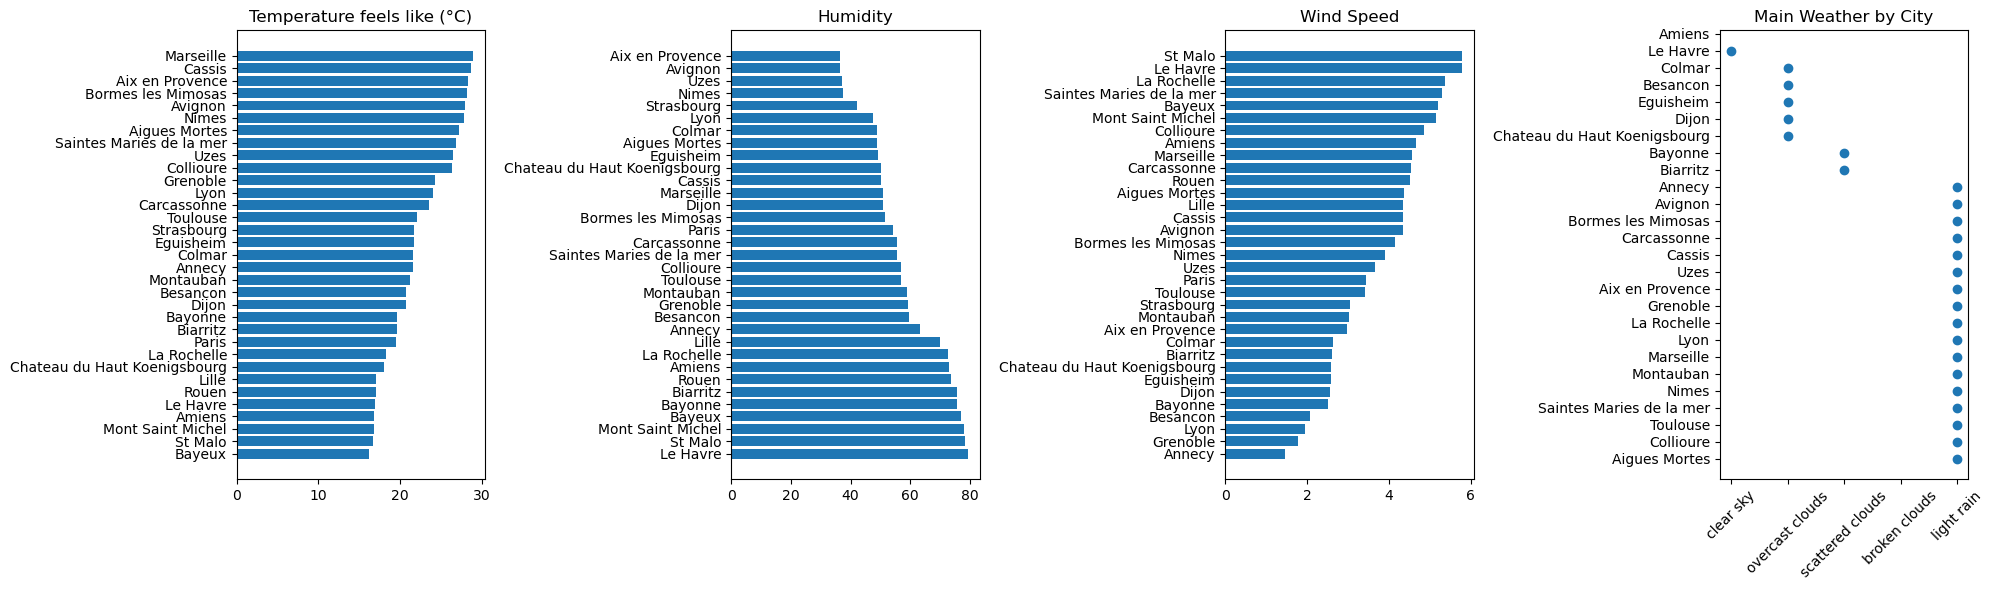

In [17]:
print("We want the highest feels_like temperature and the lowest humidity, high wind_speed for doing some kitesurfing, and nice main_weather")

# Creation of one dataframe by variable (sorted)
top_temperature = avg_forecast_weather_df.sort_values(by='feels_like', ascending=True)['feels_like']
top_humidity = avg_forecast_weather_df.sort_values(by='humidity', ascending=False)['humidity']
top_wind = avg_forecast_weather_df.sort_values(by='wind_speed', ascending=True)['wind_speed']
top_main_weather = avg_forecast_weather_df.sort_values(by='main_weather_scores', ascending=False)['main_weather_scores']

# Figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Subplot 1: Temperature
axs[0].barh(top_temperature.index, top_temperature)
axs[0].set_title('Temperature feels like (°C)')

# Subplot 2: Humidity
axs[1].barh(top_humidity.index, top_humidity)
axs[1].set_title('Humidity')

# Subplot 3: Wind Speed
axs[2].barh(top_wind.index, top_wind)
axs[2].set_title('Wind Speed')

# # Subplot 4: Main Weather
axs[3].scatter(top_main_weather, top_main_weather.index)
axs[3].set_xticks(range(1, 6))  # Assuming main_weather_scores range from 1 to 6
axs[3].set_xticklabels(avg_forecast_weather_df['main_weather'].unique(), rotation=45)
axs[3].set_title('Main Weather by City')

plt.tight_layout()
plt.show()


#### Top5 cities calculator

In [18]:
# Here we define weights for each criterion. Wind is the most important as we want to do kitesurfing.
weights = {
    'wind_speed': 10,
    'main_weather_scores': 8,
    'humidity': 5,
    'feels_like': 8
}


# We calculate a score for each city
avg_forecast_weather_df['final_score'] = round(
    avg_forecast_weather_df['wind_speed'] * weights['wind_speed'] +
    avg_forecast_weather_df['main_weather_scores'] * weights['main_weather_scores'] +
    avg_forecast_weather_df['humidity'] * weights['humidity'] +
    avg_forecast_weather_df['feels_like'] * weights['feels_like']
)

# We sort the dataframe and select top5 rows
sorted_data = avg_forecast_weather_df.sort_values(by='final_score', ascending=False)
top5_cities = sorted_data.head(5).copy()

# Add longitude and latitude from our dictionnary 'coordinates'
for city in top5_cities.index:
    for i,dico in enumerate(coordinates):
        if dico['city'] == city:
            top5_cities.loc[city, 'lon'] = dico['longitude']
            top5_cities.loc[city, 'lat'] = dico['latitude']
            break
# Convert 'lat' and 'lon' columns to float
top5_cities['lat'] = top5_cities['lat'].astype(float)
top5_cities['lon'] = top5_cities['lon'].astype(float)

display(top5_cities)

top5_cities.to_csv('scrap_results/forecast_weather_top5cities.csv')

,feels_like,humidity,wind_speed,city_id,main_weather,main_weather_scores,final_score,lon,lat
city,,,,,,,,,
La Rochelle,18.32250,72.675,5.35650,19.0,clear sky,5.0,604.0,-1.152043,46.159113
Le Havre,16.97875,79.250,5.77875,20.0,light rain,1.0,598.0,0.107973,49.493898
Saintes Maries de la mer,26.88300,55.700,5.29325,29.0,clear sky,5.0,586.0,4.428717,43.452277
Biarritz,19.65525,75.550,2.59600,9.0,scattered clouds,3.0,585.0,-1.559278,43.483252
Bayonne,19.65625,75.550,2.51275,7.0,scattered clouds,3.0,584.0,-1.473666,43.494514


In [5]:
top5_cities = pd.read_csv('scrap_results/forecast_weather_top5cities.csv')

#### Top5 cities map

In [7]:
fig = px.scatter_mapbox(
    top5_cities, 
    title="Top 5 cities for our kite surfing trip", 
    lat="lat", 
    lon="lon", 
    color="wind_speed",
    size="feels_like",
    zoom=5, 
    mapbox_style="open-street-map",
    hover_name=top5_cities.index,
    hover_data = ['wind_speed', 'main_weather','feels_like','humidity'],
)

fig.show()

fig.write_html("final pictures/top_5_cities_interactive.html")

#

![alt text](https://raw.githubusercontent.com/elodiesune/PROJECT_Kayak/main/final%20pictures/top5_cities_picture.jpg)

In [22]:
best_cities = top5_cities.index.unique()
print(best_cities)

Index(['La Rochelle', 'Le Havre', 'Saintes Maries de la mer', 'Biarritz',
       'Bayonne'],
      dtype='object', name='city')
